<a href="https://colab.research.google.com/github/BubuDavid/Fundamentos-de-Procesamiento-Digital-de-Imagenes/blob/main/tareas/tarea7/Tarea7_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 7
Puede ver el código original en el siguiente link: https://colab.research.google.com/drive/1bS9qKOejcZhF7q4_gKasVfsKe28tHz6d?usp=sharing

# Funciones auxiliares

En la siguiente celda, se podrán encontrar funciones que son útiles al momento de estar trabajando en esta materia, cada función tiene su propia descripción y uso. Ya tengo un documento plantilla para copiar y pegar estas funciones por lo que puede llegar el caso de que no usemos alguna de las funcioens que estén aquí.

In [4]:
# Importando librerías
import cv2 # Para manejar imágenes
import matplotlib.pyplot as plt # Para visualizar las imágenes (Se puede hacer de otra manera con una librería de google pero meh, este está bueno)
import numpy as np # Para operar matrices de manera sencilla

##### Operaciones iniciales con imágenes (Leer, mostrar, mostrar histogramas, etc.) #####
# Desplegar histogramas
# Leer imagen en escala de grises
def read_img(img_name, **kwarg):
	"""Lee imágenes con ayuda de opencv y la muestra

	Args:
		img_name (str): Nombre del path donde se encuentra la imagen

	Returns:
		np.array: Retorna la imagen que se leyó después de mostrarla
	"""
	img = cv2.imread(img_name, cv2.IMREAD_GRAYSCALE)
	show_img(img, is_gray = True, info = True, **kwarg)
	return img

# Mostrar imágenes
def show_img(img, size = (7, 7), is_gray = True, info = False):
	"""Muestra una imagen con tamaño específico.

	Args:
		img (np.array): Imagen que se desea mostrar
		size (tuple, optional): Tamaño relativo de la imagen. Recomendado (7, 7).
		is_gray (bool, optional): Si la imagen es en blanco y negro activar. Recomendado True.
		info (bool, optional): Muestra información de la imagen como el alto, ancho, cantidad de pixeles, etc. Recomendado False.
	"""
	fig, axs = plt.subplots(figsize=size)
	if is_gray:
		axs.imshow(img, cmap='gray', vmin=0, vmax=255)
	else:
		axs.imshow(img)
	axs.axis("off")

	if info:
		print(f"Imagen de dimensiones: {img.shape}, con un total de {img.size} pixeles")

# Mostrar varias imágenes
def show_imgs_row(imgs, size = (7,7), is_gray = True, info = False, titles = None):
	"""Muestra imágenes en una sola fila (se recomiendan menos de 5 imágenes para mejor visibilidad)

	Args:
		imgs (List[np.array]): Lista de imágenes a desplegar
		size (tuple, optional): Tamaño relativo de cada imagen a desplegar. Recomendado (7,7).
		is_gray (bool, optional): Si es o no blanco y negro. Recomendado True.
		info (bool, optional): Muestra información de la imagen como el alto, ancho, cantidad de pixeles, etc. Recomendado False.
		titles (_type_, optional): Lista de títulos para la imagen. Recomendado None.
	"""
	schema = (1, len(imgs))
	options = {}
	if is_gray:
		options["cmap"] = "gray"
		options["vmin"] = 0
		options["vmax"] = 255

	fig, axs = plt.subplots(*schema, figsize=size)

	for index in range(len(imgs)):
		axs[index].imshow(imgs[index], **options)
		axs[index].axis("off")
		if titles:
			axs[index].set_title(titles[index])

def show_histograms(imgs, bin_value = 20, colors = [None, "g"], titles = ["Normal", "No normal"], normalized = True, edgecolor = "black", cumulative = False, size = (15, 5), **kwargs):
	"""Muestra y regresa histogramas de las imágenes que le pases.

	Args:
		imgs (List[np.array]): Lista de imágenes a calcular sus histograms
		bin_value (int, optional): Rango de los bins en nuestros plots. Recomendado 20.
		colors (list, optional): Lista de colores para los histogramas. Recomendado [None, "g"].
		titles (list, optional): Lista de títulos para los histogramas. Recomendado ["Normal", "No normal"].
		normalized (bool, optional): Dicta si los histogramas están normalizados o no. Recomendado True.
		edgecolor (str, optional): El color del borde de cada bin, también se puede dejar en None si no quieres borde. Recomendado "black".
		cumulative (bool, optional): Esto indica si los histogramas son acumultivos o no. Recomendado False.
		size (tuple, optional): Tamaño de las gráficas. Recomendado (15, 5).

	Returns:
		hist: Lista con los histogramas calculados.
		bins: Lista con los bins calculados aunque usualmente son iguales todos.
	"""
	if type(imgs) != list:
		imgs = [imgs]
	if type(titles) != list:
		titles = [titles]
	
	flattens = np.array(list(map(lambda img: img.ravel(), imgs)))
	bins = np.array([np.linspace(0, 255, bin_value) for i in range(len(imgs))])
	hists = []
	fig, ax = plt.subplots(1, len(imgs), figsize = size)
	
	if len(imgs) == 1:
		img, b = imgs[0], bins[0]
		
		hist, b = np.histogram(img, bins = b)
		if normalized:
			hist = hist / img.size
		if cumulative:
			hist = np.cumsum(hist)
		ax.hist(b[:-1], b, weights = hist, color = colors[0], edgecolor = edgecolor, **kwargs)
		ax.set_title(titles[0])
		return hist, b
	else:
		for index in range(len(flattens)):
			img, b = imgs[index], bins[index]
			hist, b = np.histogram(img, bins = b)
			if normalized:
				hist = hist / img.size
			if cumulative:
				hist = np.cumsum(hist)
			
			ax[index].hist(b[:-1], b, weights = hist, color = colors[index], edgecolor = edgecolor, **kwargs)
			ax[index].set_title(titles[index])
			hists.append(hist)
	return hists, bins

###### Transformaciones generales sobre imágenes ######
# Creditos: http://learnwebgl.brown37.net/08_projections/projections_mapping.html
def img_scale(img, minf, maxf):
    a, b = np.min(img), np.max(img)
    scale = (maxf - minf)/(b - a)
    offset = -a*scale + minf
    rescaled = img*scale + offset
    return rescaled

###### Transformaciones de intensidades de imágenes ######

# Binarize images

# Transformación Negativa
def imcomplement(img):
	"""Función para generar el negativo de una imagen en blanco y negro

	Args:
		img (np.array): Imagen a negativizar

	Returns:
		negative_img: Imagen negativa
	"""
	return np.abs(255 - img)

# Genera imagenes binarias
def binarize(img, max_val):
	"""Genera imágenes binarias a partir de un cierto max_val

	Args:
		img (np.array): Imagen a binarizar
		max_val (int): Límite en el cual se considera 1 o 0

	Returns:
		binarized_img: Imagen binaria obtenida
	"""
	return (img >= max_val) * 255

# Credits: https://www.nzfaruqui.com/contrast-stretching-in-image-processing-using-matlab/
def imadjust(img,lim_in = [0, 1], lim_out = [0, 1], gamma=1, plot = False):
	"""Imagen que ajusta a un rango determinado con una gamma correction definida (Hace lo mismo que la función de matlab)

	Args:
		img (np.array): Imagen a transformar
		lim_in (list, optional): Limites de la imagen de input. Defaults to [0, 1].
		lim_out (list, optional): Limites de la imagen de output. Defaults to [0, 1].
		gamma (int, optional): Factor gamma de la función. Defaults to 1.
		plot (bool, optional): Si se desea graficar le función gamma. Defaults to False.

	Returns:
		adjusted_img: Imagen ajustada
	"""
	c, d = lim_in
	a, b = lim_out
	# Normalización para que esto funcione
	img_cp = img.copy()
	if np.max(img_cp) > 1:
		img_cp = img_cp / np.max(img_cp)

	# Básicamente esto es lo que hace imadjust ☝ ver la fuente para mayor información
	adj = (((img_cp - a) / (b - a)) ** gamma) * (d - c) + c
	# Regresando a las dimensiones originales
	adj = np.int64(adj / np.max(adj) * 255)

	# Grafica la función
	if plot:
		x = np.linspace(0, 1, 1000)
		y = (((x - a) / (b - a)) ** gamma) * (d - c) + c
		plt.plot(x,y, c='g')
		plt.title(f'Función adjust con a={a}, b={b}, c={c}, d={d}, gamma={gamma}')
	return adj

def equalizeHist(img):
	"""Función que ecualiza el histograma de una imagen

	Args:
		img (np.array): Imagen a ser ecualizada

	Returns:
		equ_img: Imagen Ecualizada
	"""
	return cv2.equalizeHist(img)

# Problemas y resolución

## 1. (4 puntos) Utilizando la imagen Fg0316(a).tif y un kernel de promediación de 31x31 pixeles, realice lo siguiente usando imfilt:

Imagen de dimensiones: (512, 512), con un total de 262144 pixeles


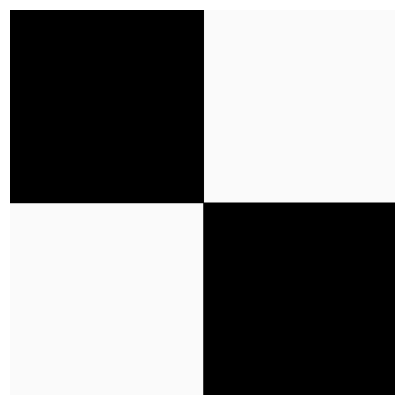

In [5]:
# Leyendo la imagen y mostrandola
img = read_img("Fig0316(a).tif", size = (5,5))

In [6]:
# Se define el kernel de promediación
w = np.ones((31,31)) / (31 * 31)

### a. Filtre la imagen usando la opción de bordes con rellenado de 0´s. Reporte imagen resultante

In [7]:
# Para esto se tiene que importar cosas
from scipy.ndimage import correlate, convolve

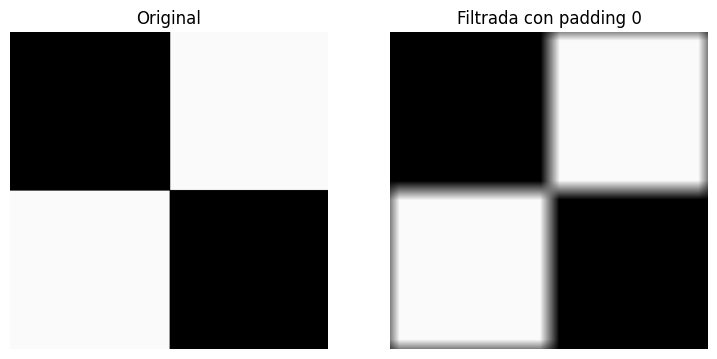

In [8]:
# Bordes rellenados de 0
filtered1 = correlate(img, w, mode = "constant")
show_imgs_row(
    [img, filtered1],
     is_gray = True, 
     size = (9, 9),
     titles = ["Original", "Filtrada con padding 0"]
)

### b. Filtre la imagen usando la opción de bordes con la opción ‘symmetric’. Reporte imagen resultante.

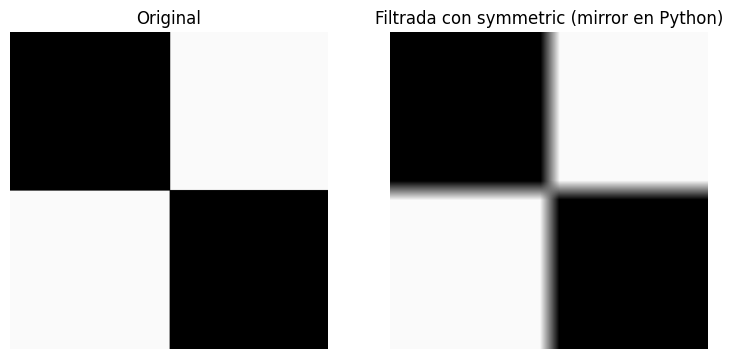

In [9]:
# Bordes rellenados de 0 # mirror = Symmetric
filtered2 = correlate(img, w, mode = "mirror")
show_imgs_row(
    [img, filtered2],
     is_gray = True, 
     size = (9, 9),
     titles = ["Original", "Filtrada con symmetric (mirror en Python)"]
)

### c. Filtre la imagen usando la opción de bordes con la opción ‘replicate. Reporte imagen resultante.

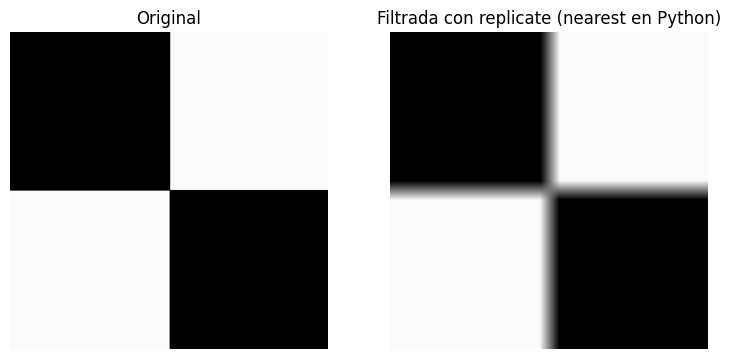

In [10]:
# Bordes rellenados de 0 # nearest = replicate
filtered3 = correlate(img, w, mode = "nearest")
show_imgs_row(
    [img, filtered3],
     is_gray = True, 
     size = (9, 9),
     titles = ["Original", "Filtrada con replicate (nearest en Python)"]
)

### d. Filtre la imagen usando la opción de bordes con la opción ‘circular. Reporte imagen resultante.

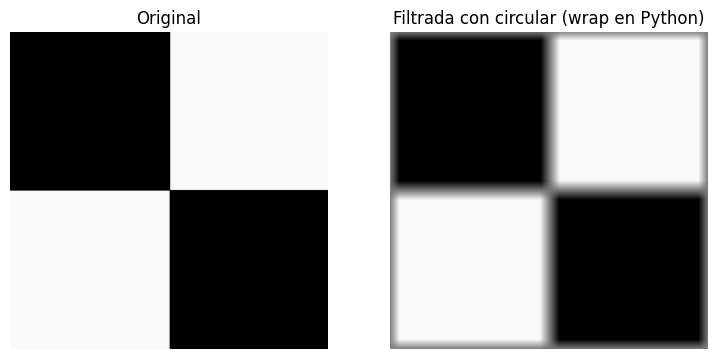

In [11]:
# Bordes rellenados de 0 # wrap = circular
filtered4 = correlate(img, w, mode = "wrap")
show_imgs_row(
    [img, filtered4],
     is_gray = True, 
     size = (9, 9),
     titles = ["Original", "Filtrada con circular (wrap en Python)"]
)

### Explique los efectos de bordes resultantes.

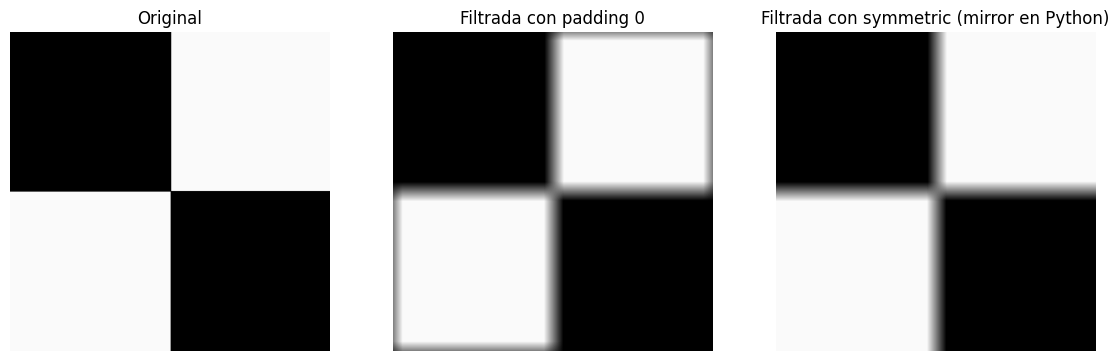

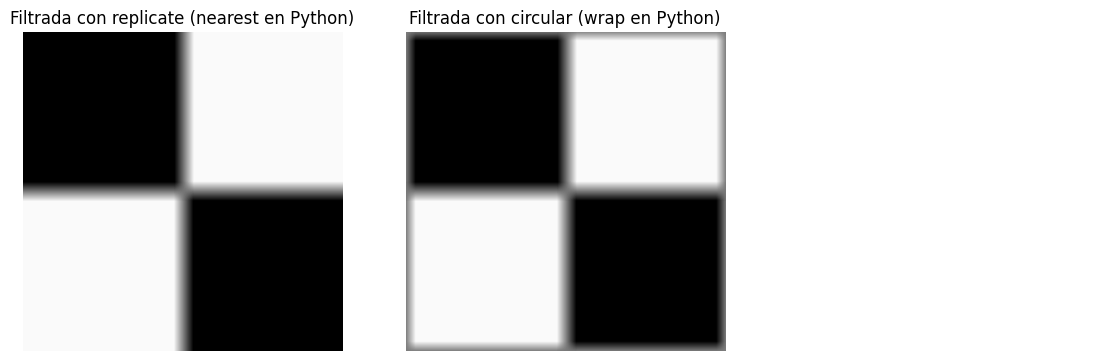

In [12]:
# Mostrando todos los resultados
show_imgs_row(
    [img, filtered1, filtered2],
     is_gray = True, 
     size = (14, 14),
     titles = ["Original", "Filtrada con padding 0", "Filtrada con symmetric (mirror en Python)"],
)

show_imgs_row(
    [filtered3, filtered4, (filtered4 + 1) * 1000],
     is_gray = True, 
     size = (14,14),
     titles = ["Filtrada con replicate (nearest en Python)", "Filtrada con circular (wrap en Python)", ""],
)

**Filtrada con padding 0**: Note que en las orillas hay un borde negro, esto es porque en nuestro padding de 0's se promedian en las orillas haciendo estas "franjas" negras que están por ahí.

**Filtrada con symmetric**: Los exteriores se ven bastante igual que la imagen original, esto debido a que la imagen se comporta igual fuera del mismo rango de la imagen que dentro, por eso no hay cambios de afuera hacia dentro.

**Filtrada con replicate**: Prácticamente lo mismo que en symmetric

**Filtrada con circular**: Dada la naturaleza de nuestra imagen, en los bordes exteriores de los cuadros blancos hay lineas más oscuras (porque se "rellena" con cuadros negros) y los bordes exteriores de los cuadros negros son más claros porque este se "rellena" con cuadros blancos.

## 2. (4 puntos) Repita lo indicado en la pregunta uno pero ahora use un kernel ‘laplacian’ con una alpha=0.4

Esto lo tuve que programar desde 0, la función se puede observar en la siguiente celda. De una vez voy a definir la función para el caso de motion.

In [13]:
def fspecial_laplacian(alpha = 1/5):
    alpha = max(0,min(alpha,1))
    h1 = alpha/(alpha+1)
    h2 = (1-alpha)/(alpha+1)
    h = np.array([[h1, h2, h1], [h2, -4/(alpha + 1), h2], [h1, h2, h1]])
    return h

In [27]:
def print_h(h):
    for row in h:
        for el in row:
            print(f"{el:.4f}", end = '\t')
        print()

In [88]:
# Funciones auxiliares para matlab:
def fix(x):
    if x > 0:
        return np.floor(x)
    return np.ceil(x)

def fspecial_motion(p2 = 0, p3 = 0):
    eps = 2.2204e-16
    length = max(1,p2)
    half = (length-1)/2 # rotate half lengthgth around center
    phi = (p3 % 180)/180*np.pi

    cosphi = np.cos(phi)
    sinphi = np.sin(phi)
    xsign = np.sign(cosphi)
    ysign = np.sign(sinphi)
    linewdt = 1


    # define mesh for the half matrix, eps takes care of the right size
    # for 0 & 90 rotation
    sx = fix(half*cosphi + linewdt*xsign - length*eps)
    sy = fix(half*sinphi + linewdt - length*eps)

    x, y = np.meshgrid(np.arange(0,sx + xsign,xsign), np.arange(0,sy + 1))


    # define shortest distance from a pixel to the rotated line
    dist2line = (y*cosphi-x*sinphi) # distance perpendicular to the line
    rad = np.sqrt(x**2 + y**2)


    # find points beyond the line's end-point but within the line width
    # lastpix = find((rad >= half) and (np.abs(dist2line) <= linewdt));
    lastpix1 = np.where(rad.ravel() >= half)
    lastpix2 = np.where(np.abs(dist2line.ravel()) <= linewdt)
    lastpix = np.array(list(set(lastpix1[0]) & set(lastpix2[0]))) # + 1 because of matlab indexing

    # distance to the line's end-point parallel to the line
    x2lastpix = half - np.abs((x.ravel()[lastpix] + dist2line.ravel()[lastpix]*sinphi)/cosphi)


    dist2line.ravel()[lastpix] = np.sqrt(dist2line.ravel()[lastpix]**2 + x2lastpix.ravel()**2)
    dist2line = linewdt + eps - np.abs(dist2line)
    dist2line[dist2line<0] = 0 # zero out anything beyond line width


    # unfold half-matrix to the full size
    h = np.rot90(dist2line,2)
    new_h = np.zeros((len(h)*2 - 1, len(h[0])*2 - 1))
    new_h[:len(h), :len(h[0])] = h
    new_h[len(h)-1:, len(h[0])-1:] = dist2line

    h = new_h
    h = h/np.sum(h) + eps*length**2

    if cosphi > 0:
        h = np.flipud(h);


    return h

k = fspecial_motion(20, 0)

In [54]:
# Obteniendo el kernel
w_laplacian = fspecial_laplacian(0.4)

### a. Filtre la imagen usando la opción de bordes con rellenado de 0´s. Reporte imagen resultante

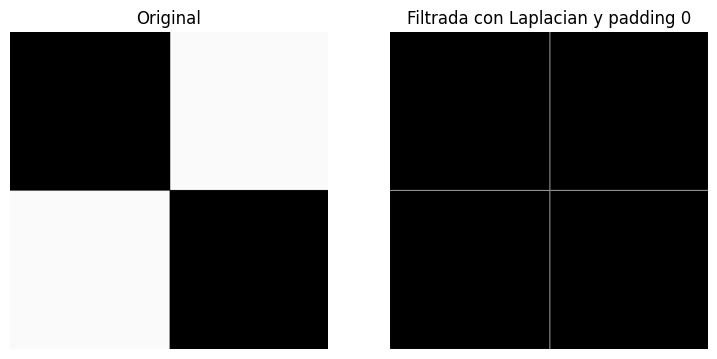

In [55]:
# Bordes rellenados de 0
f_laplacian1 = correlate(img, w_laplacian, mode = "constant")
show_imgs_row(
    [img, f_laplacian1],
     is_gray = True, 
     size = (9, 9),
     titles = ["Original", "Filtrada con Laplacian y padding 0"]
)

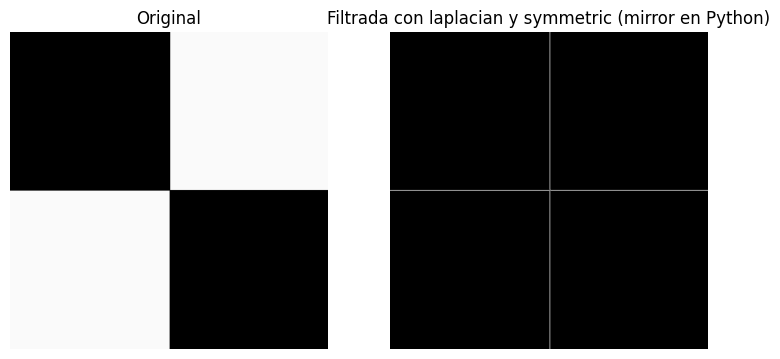

In [56]:
# Bordes rellenados de 0 # mirror = Symmetric
f_laplacian2 = correlate(img, w_laplacian, mode = "mirror")
show_imgs_row(
    [img, f_laplacian2],
     is_gray = True, 
     size = (9, 9),
     titles = ["Original", "Filtrada con laplacian y symmetric (mirror en Python)"]
)

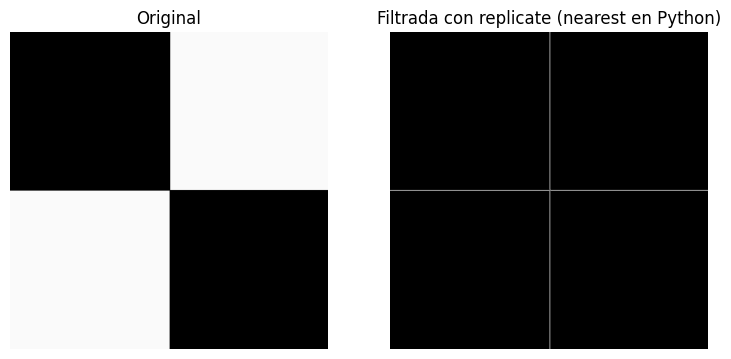

In [18]:
# Bordes rellenados de 0 # nearest = replicate
f_laplacian3 = correlate(img, w_laplacian, mode = "nearest")
show_imgs_row(
    [img, f_laplacian3],
     is_gray = True, 
     size = (9, 9),
     titles = ["Original", "Filtrada con replicate (nearest en Python)"]
)

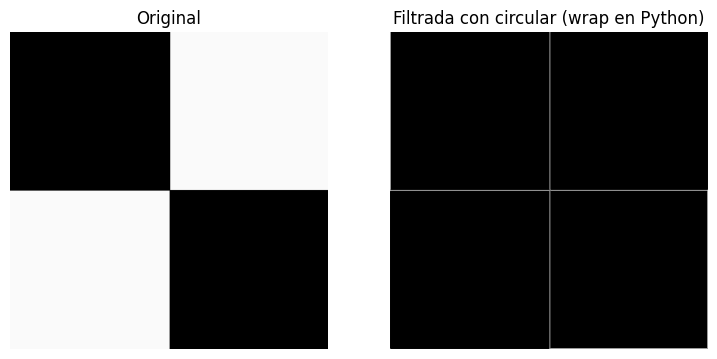

In [19]:
# Bordes rellenados de 0 # wrap = circular
f_laplacian4 = correlate(img, w_laplacian, mode = "wrap")
show_imgs_row(
    [img, f_laplacian4],
     is_gray = True, 
     size = (9, 9),
     titles = ["Original", "Filtrada con circular (wrap en Python)"]
)

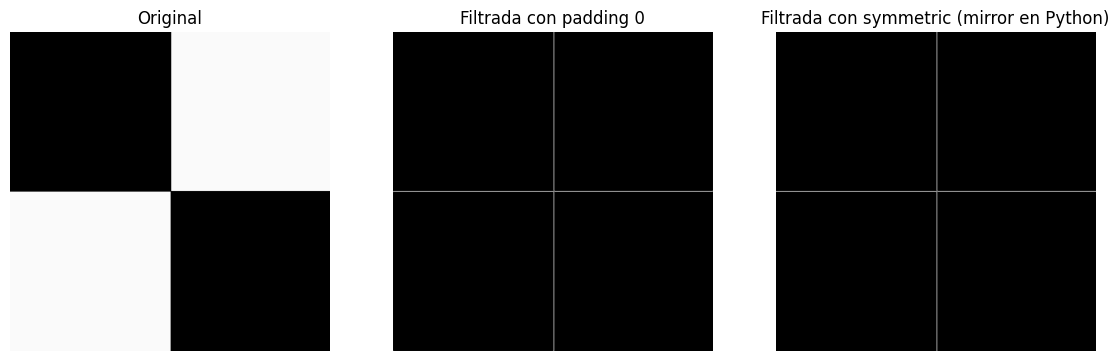

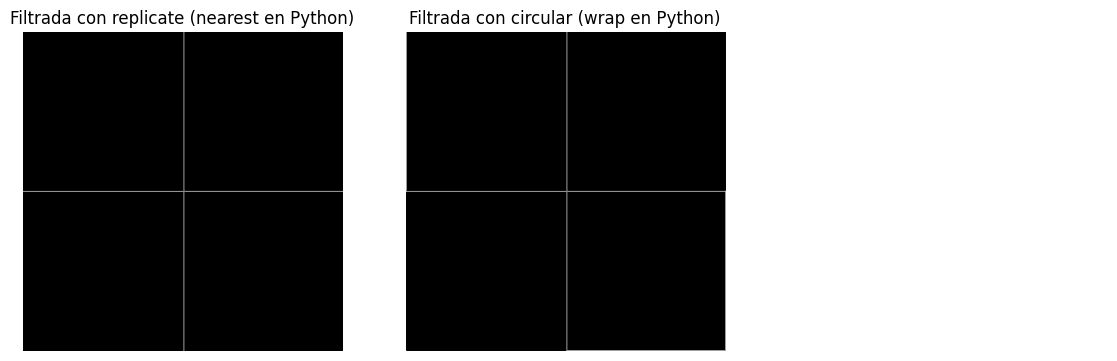

In [20]:
# Mostrando todos los resultados
show_imgs_row(
    [img, f_laplacian1, f_laplacian2],
     is_gray = True, 
     size = (14, 14),
     titles = ["Original", "Filtrada con padding 0", "Filtrada con symmetric (mirror en Python)"],
)

show_imgs_row(
    [f_laplacian3, f_laplacian4, (f_laplacian4 + 1) * 1000],
     is_gray = True, 
     size = (14,14),
     titles = ["Filtrada con replicate (nearest en Python)", "Filtrada con circular (wrap en Python)", ""],
)

ESto es medio confuso, veamos su negativo para ver si hay diferencias importantes:

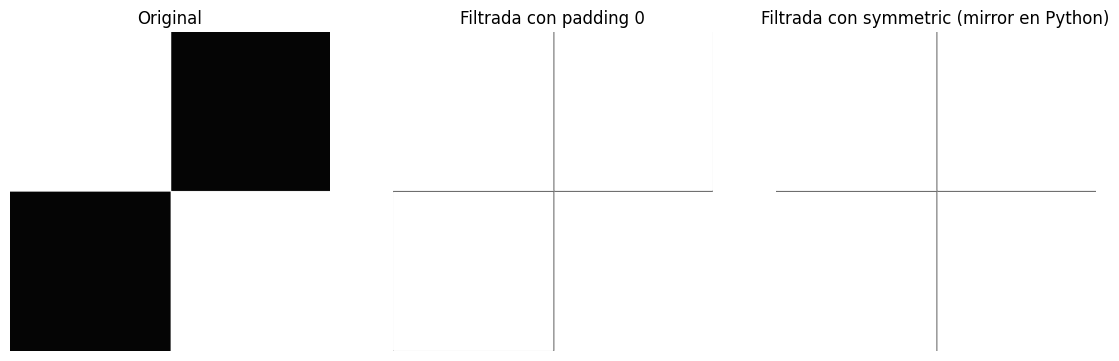

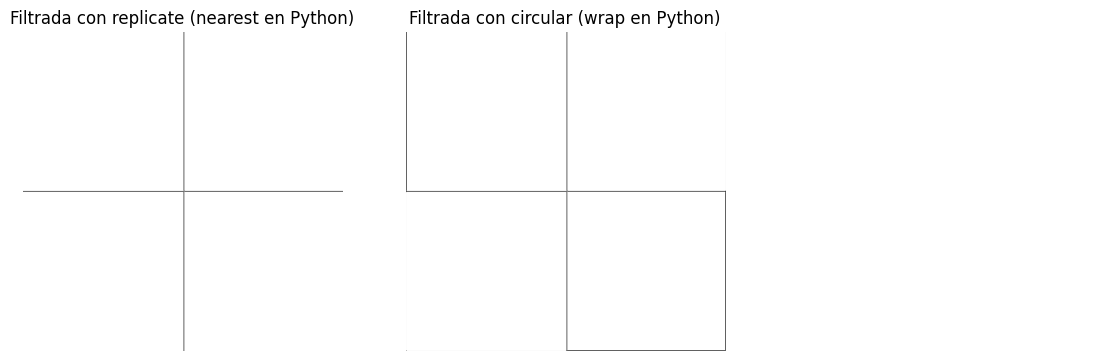

In [21]:
# Mostrando todos los resultados
show_imgs_row(
    [imcomplement(img), imcomplement(f_laplacian1), imcomplement(f_laplacian2)],
     is_gray = True, 
     size = (14, 14),
     titles = ["Original", "Filtrada con padding 0", "Filtrada con symmetric (mirror en Python)"],
)

show_imgs_row(
    [imcomplement(f_laplacian3), imcomplement(f_laplacian4), (f_laplacian4 + 1) * 1000],
     is_gray = True, 
     size = (14,14),
     titles = ["Filtrada con replicate (nearest en Python)", "Filtrada con circular (wrap en Python)", ""],
)

## Utilice la imagen de 'cameraman' de matlab para hacer lo siguiente:

Imagen de dimensiones: (490, 487), con un total de 238630 pixeles


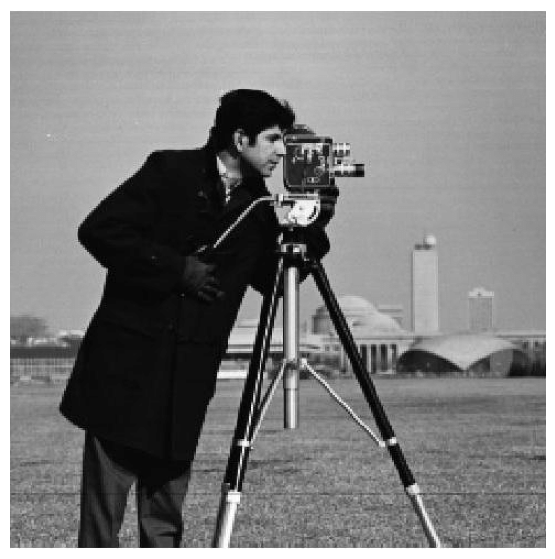

In [89]:
camera = read_img("cameraman.png")

### a. Genere un kernel que simule un movimiento lineal de 20 pixeles en dirección horizontal

In [90]:
# Generando el kernel
k1 = fspecial_motion(20, 0)

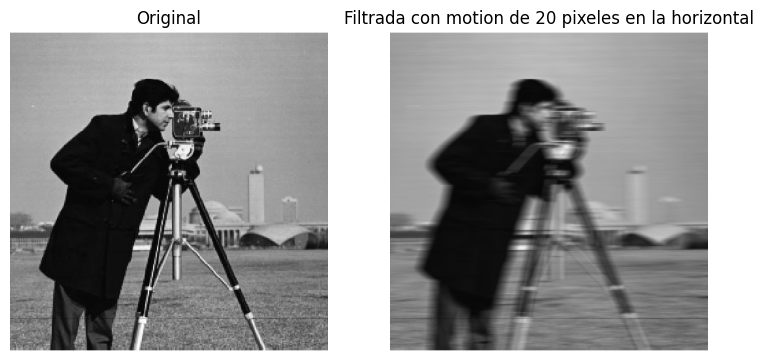

In [91]:
# Bordes rellenados de 0 # nearest = replicate
motion1 = correlate(camera, k1, mode = "nearest")
show_imgs_row(
    [camera, motion1],
     is_gray = True, 
     size = (9, 9),
     titles = ["Original", "Filtrada con motion de 20 pixeles en la horizontal"]
)

### b. Genere un kernel que simule un movimiento lineal de 20 pixeles en dirección vertical

In [92]:
# Generando el kernel
k2 = fspecial_motion(20, 90)

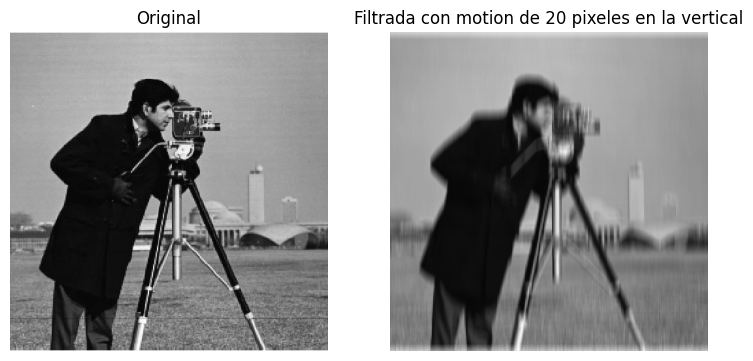

In [93]:
# Bordes rellenados de 0 # nearest = replicate
motion2 = correlate(camera, k2, mode = "nearest")
show_imgs_row(
    [camera, motion2],
     is_gray = True, 
     size = (9, 9),
     titles = ["Original", "Filtrada con motion de 20 pixeles en la vertical"]
)

### c. Genere un kernel que simule un movimiento lineal de 20 pixeles en dirección 30º respecto a la horizontal

In [99]:
# Generando el kernel
k3 = fspecial_motion(20, 30)

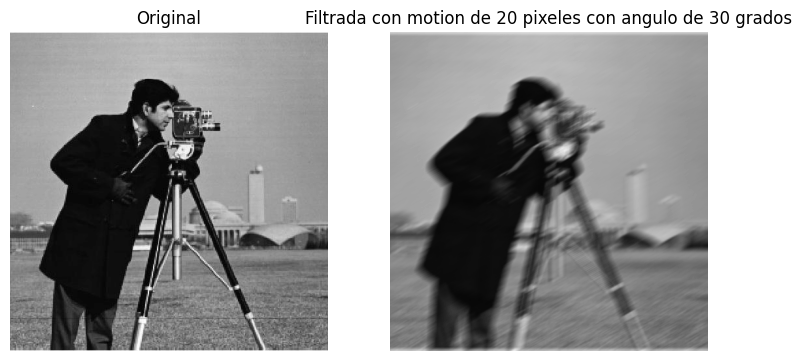

In [100]:
# Bordes rellenados de 0 # nearest = replicate
motion3 = correlate(camera, k3, mode = "nearest")
show_imgs_row(
    [camera, motion3],
     is_gray = True, 
     size = (9, 9),
     titles = ["Original", "Filtrada con motion de 20 pixeles con angulo de 30 grados"]
)

### d. Genere un kernel que simule un movimiento lineal de 20 pixeles en dirección -30º respecto a la horizontal

In [101]:
# Generando el kernel
k4 = fspecial_motion(20, -30)

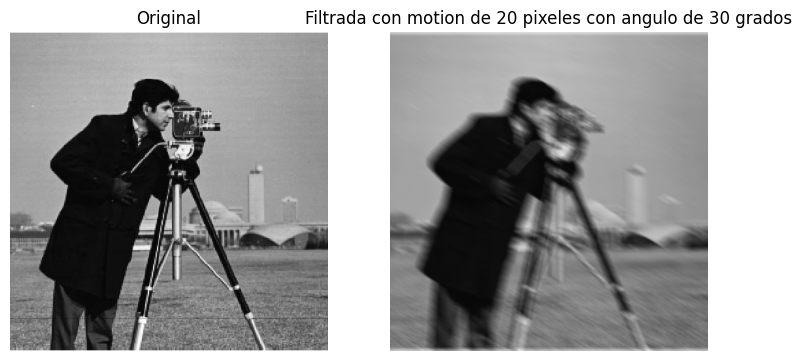

In [103]:
# Bordes rellenados de 0 # nearest = replicate
motion4 = correlate(camera, k4, mode = "nearest")
show_imgs_row(
    [camera, motion4],
     is_gray = True, 
     size = (9, 9),
     titles = ["Original", "Filtrada con motion de 20 pixeles con angulo de 30 grados"]
)